<a href="https://colab.research.google.com/github/esconjaureguy/codon_usage/blob/main/codon_usage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

El archivo contiene datos sobre el uso de codones en diferentes especies, con varias columnas que representan frecuencias de codones (como "UUU", "UUC", etc.) y otra información relacionada (por ejemplo, "Kingdom", "DNAtype", "SpeciesID").

https://www.kaggle.com/datasets/meetnagadia/condon-usage-dataset

 Implementar un modelo de clasificación supervisado que pueda aprender patrones distintivos en las frecuencias de codones que permiten predecir con precisión el reino biológico (virus, bacterias, eucariotas) al que pertenece una especie.

In [ ]:
#Importamos las librerias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style

In [ ]:
#levanto el data set
df=pd.read_csv('https://raw.githubusercontent.com/esconjaureguy/codon_usage/refs/heads/main/codon_usage.csv')
df

<ipython-input-2-b924aa866b15>:2: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('https://raw.githubusercontent.com/esconjaureguy/codon_usage/refs/heads/main/codon_usage.csv')


,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,vrl,0,100217,1995,Epizootic haematopoietic necrosis virus,0.01654,0.01203,0.00050,0.00351,0.01203,...,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
1,vrl,0,100220,1474,Bohle iridovirus,0.02714,0.01357,0.00068,0.00678,0.00407,...,0.00136,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
2,vrl,0,100755,4862,Sweet potato leaf curl virus,0.01974,0.0218,0.01357,0.01543,0.00782,...,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
3,vrl,0,100880,1915,Northern cereal mosaic virus,0.01775,0.02245,0.01619,0.00992,0.01567,...,0.00366,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
4,vrl,0,100887,22831,Soil-borne cereal mosaic virus,0.02816,0.01371,0.00767,0.03679,0.01380,...,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13023,pri,0,9601,1097,Pongo pygmaeus abelii,0.02552,0.03555,0.00547,0.01367,0.01276,...,0.00820,0.01367,0.01094,0.01367,0.02279,0.02005,0.04102,0.00091,0.00091,0.00638
13024,pri,1,9601,2067,mitochondrion Pongo pygmaeus abelii,0.01258,0.03193,0.01984,0.00629,0.01451,...,0.00145,0.00000,0.00048,0.00194,0.01306,0.01838,0.00677,0.00242,0.00097,0.01887
13025,pri,1,9602,1686,mitochondrion Pongo pygmaeus pygmaeus,0.01423,0.03321,0.01661,0.00356,0.01127,...,0.00000,0.00000,0.00000,0.00178,0.01661,0.02788,0.00297,0.00356,0.00119,0.02017
13026,pri,0,9606,40662582,Homo sapiens,0.01757,0.02028,0.00767,0.01293,0.01319,...,0.01142,0.01217,0.01196,0.02178,0.02510,0.02896,0.03959,0.00099,0.00079,0.00156


In [ ]:
df.shape

(13028, 69)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13028 entries, 0 to 13027
Data columns (total 69 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Kingdom      13028 non-null  object 
 1   DNAtype      13028 non-null  int64  
 2   SpeciesID    13028 non-null  int64  
 3   Ncodons      13028 non-null  int64  
 4   SpeciesName  13028 non-null  object 
 5   UUU          13028 non-null  object 
 6   UUC          13028 non-null  object 
 7   UUA          13028 non-null  float64
 8   UUG          13028 non-null  float64
 9   CUU          13028 non-null  float64
 10  CUC          13028 non-null  float64
 11  CUA          13028 non-null  float64
 12  CUG          13028 non-null  float64
 13  AUU          13028 non-null  float64
 14  AUC          13028 non-null  float64
 15  AUA          13028 non-null  float64
 16  AUG          13028 non-null  float64
 17  GUU          13028 non-null  float64
 18  GUC          13028 non-null  float64
 19  GUA 

In [ ]:
#ver los valores de mi posible variables target
print(df['Kingdom'].unique())
print(df['SpeciesName'].unique())

['vrl' 'arc' 'bct' 'phg' 'plm' 'pln' 'inv' 'vrt' 'mam' 'rod' 'pri']
['Epizootic haematopoietic necrosis virus' 'Bohle iridovirus'
 'Sweet potato leaf curl virus' ...
 'mitochondrion Pongo pygmaeus pygmaeus' 'Homo sapiens'
 'mitochondrion Homo sapiens']


vrl (Virus)
bct (Bacterias)
pln (Plantas)
ani (Animales)
arc (Arqueas)
fun (Hongos)

<Axes: >

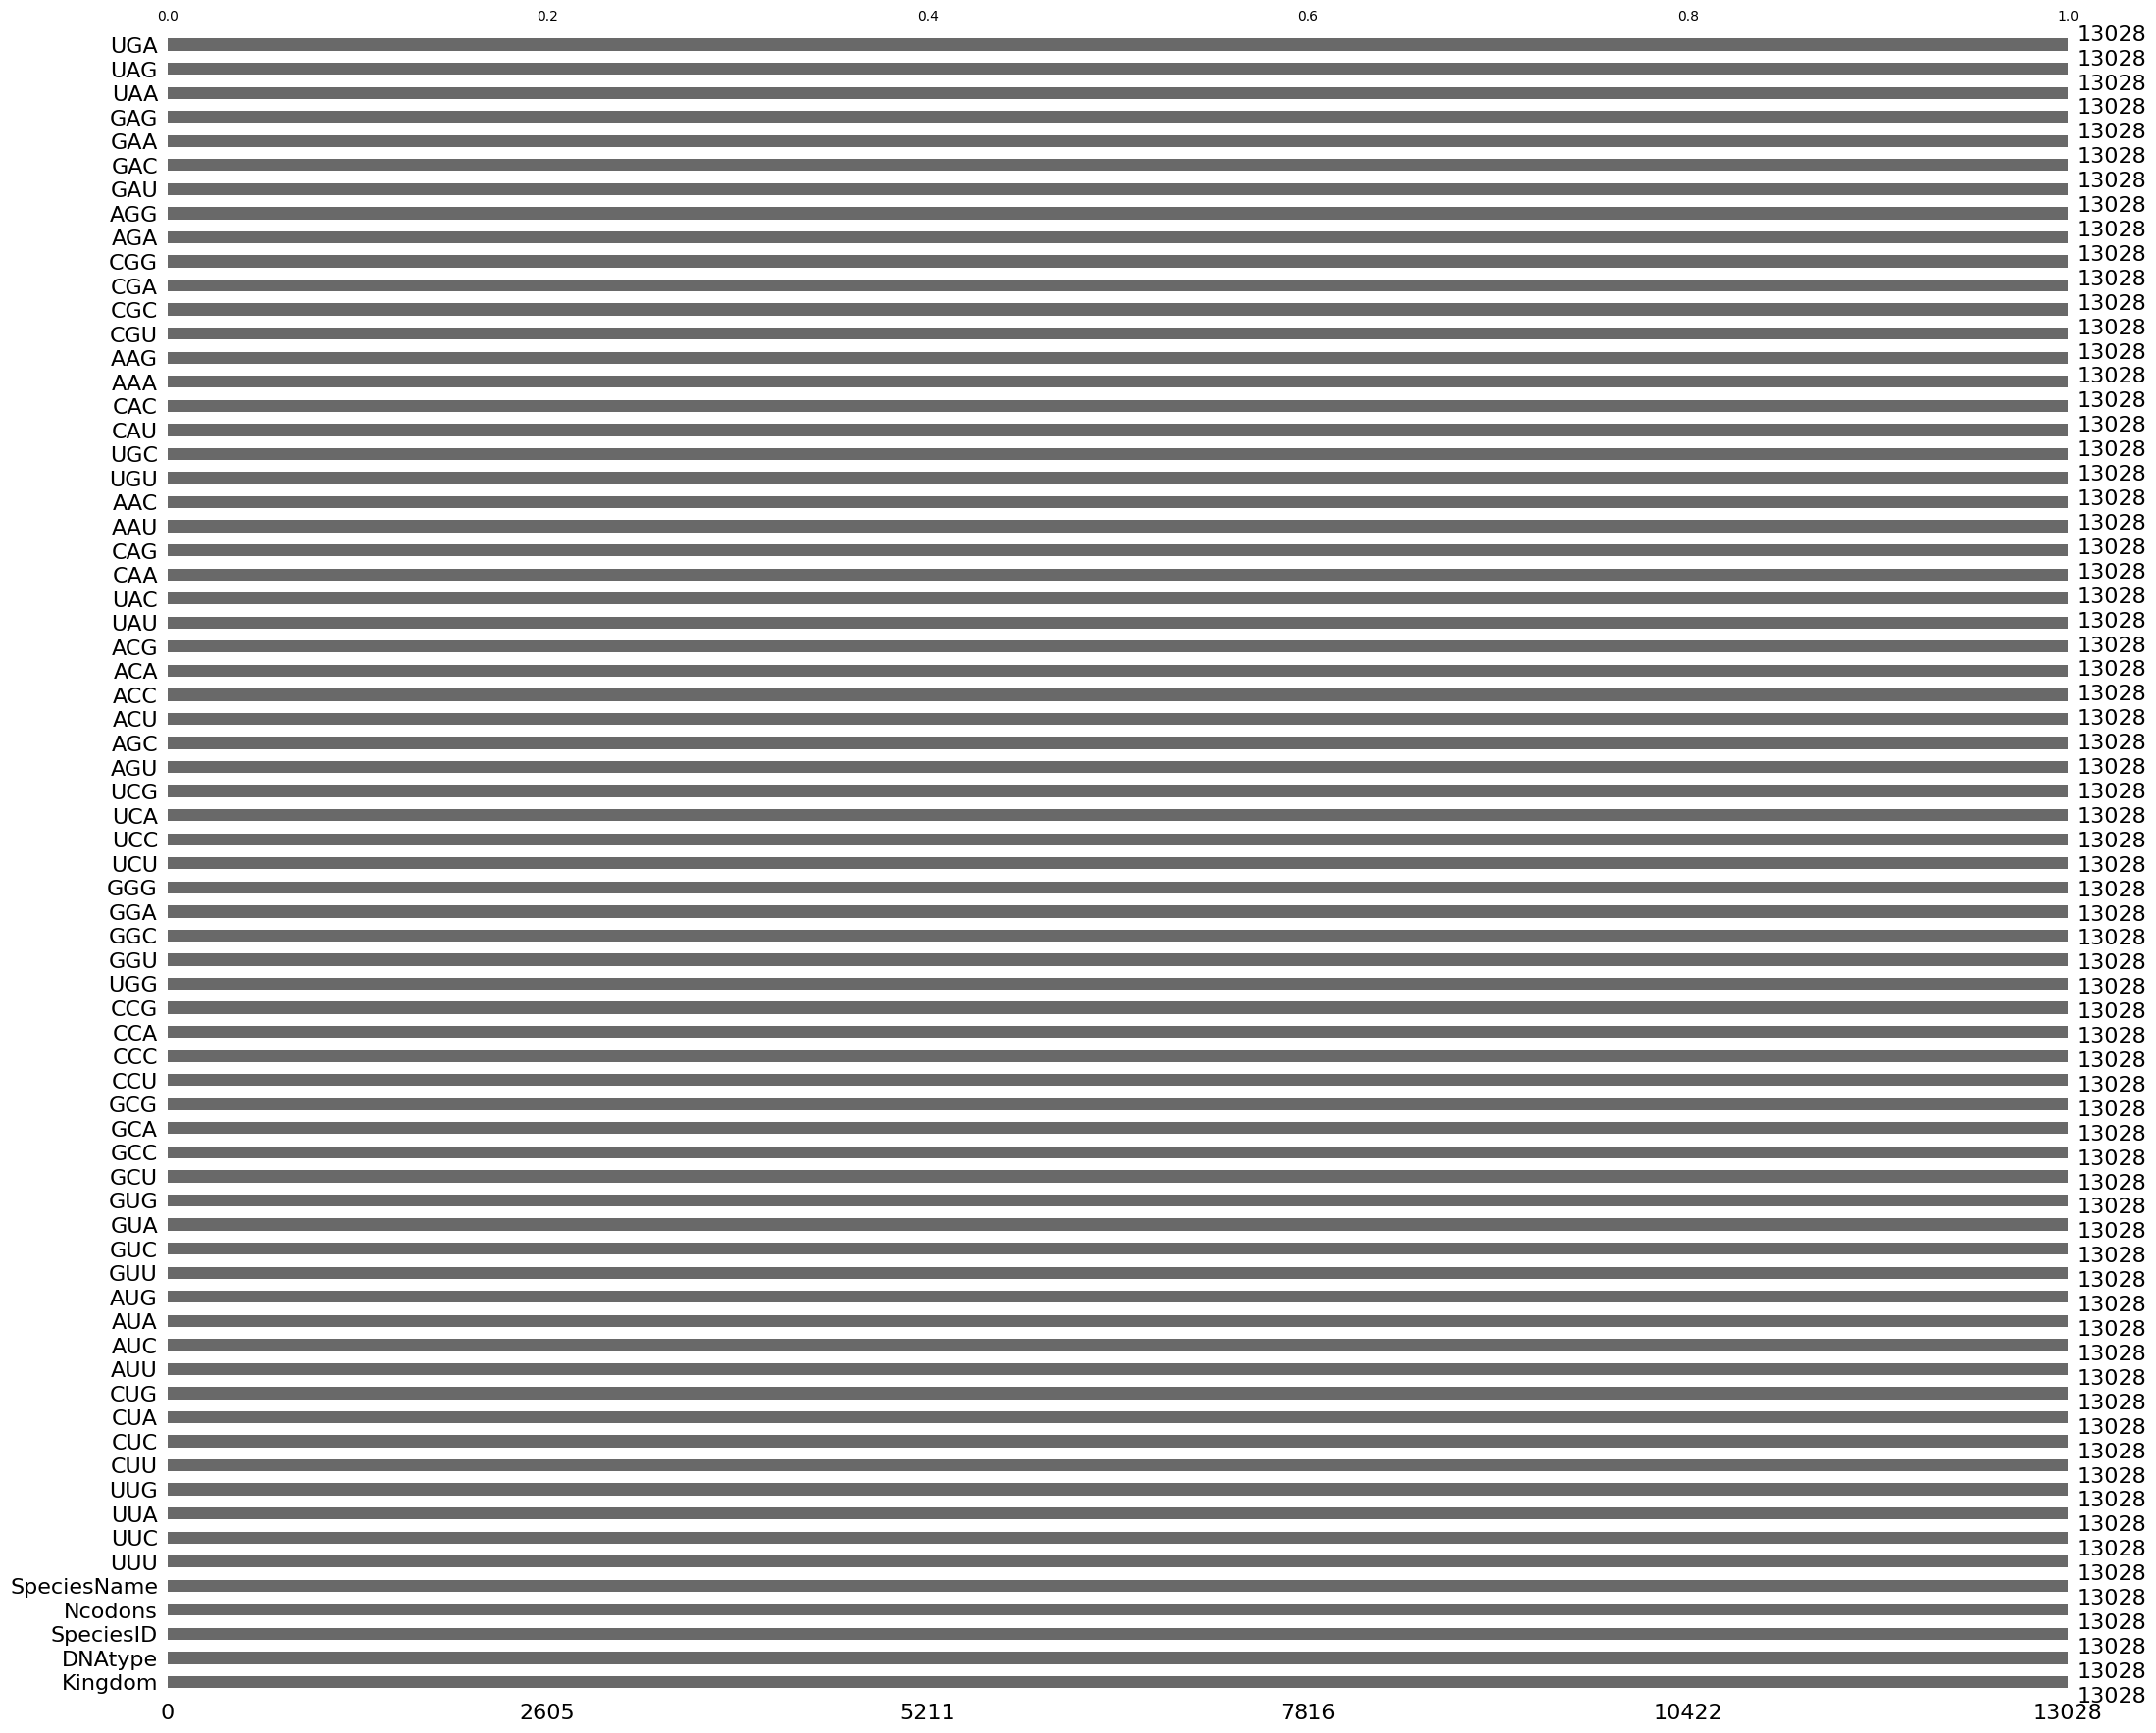

In [ ]:
import missingno as msno

# Visualización de los valores nulos en un gráfico de barras
msno.bar(df)

In [ ]:
df.isnull().sum()

,0
Kingdom,0
DNAtype,0
SpeciesID,0
Ncodons,0
SpeciesName,0
...,...
GAA,0
GAG,0
UAA,0
UAG,0


No hay valores nulos


In [ ]:
!pip install dataprep

In [ ]:
#solo para visualizar las variables despues hago mis propios análisis
from dataprep.eda import create_report
create_report(df)

ModuleNotFoundError: No module named 'dataprep'

In [ ]:
# Datosque se extraen de la url:https://www.ensembl.org/Multi/Search/Results?q=35s;site=ensembl;page=1;facet_feature_type=Gene
data = """
TRAV35 (Human Gene)
ENSG00000211814 14:22221896-22222475:1
T cell receptor alpha variable 35 [Source:HGNC Symbol;Acc:HGNC:12134].
MAT2A (Human Gene)
ENSG00000168906 2:85539168-85545281:1
Methionine adenosyltransferase 2A [Source:HGNC Symbol;Acc:HGNC:6904].
Washc3 (Mouse Gene, Strain: reference (CL57BL6))
ENSMUSG00000020056 10:88036955-88082020:1
WASH complex subunit 3 [Source:MGI Symbol;Acc:MGI:1914532].
Anks1b (Mouse Gene, Strain: reference (CL57BL6))
ENSMUSG00000058589 10:89709371-90809162:1
Ankyrin repeat and sterile alpha motif domain containing 1B [Source:MGI Symbol;Acc:MGI:1924781].
prss35 (Zebrafish Gene)
ENSDARG00000109353 ALT_CTG16_1_16:20084-21340:1
Serine protease 35 [Source:ZFIN;Acc:ZDB-GENE-040704-55].
novel gene (Collared flycatcher Gene)
ENSFALG00000011108 22:3645843-3650821:-1
Novel gene.
novel gene (Baker's yeast Gene)
RDN37-1 XII:451786-457732:-1
35S ribosomal RNA (35S rRNA) transcript; encoded by the RDN1 locus; processed into the 25S, 18S and 5.8S rRNAs (represented by the RDN25, RDN18, and RDN58 loci) [Source:SGD;Acc:S000006486].
novel gene (Baker's yeast Gene)
RDN37-2 XII:460923-466869:-1
35S ribosomal RNA (35S rRNA) transcript; encoded by the RDN1 locus; processed into the 25S, 18S and 5.8S rRNAs (represented by the RDN25, RDN18, and RDN58 loci) [Source:SGD;Acc:S000006487].
novel gene (Baker's yeast Gene)
snR30 XII:198784-199389:1
H/ACA box small nucleolar RNA (snoRNA); essential gene required for cleavage of 35S primary rRNA transcript to release the precursor to the 18S rRNA [Source:SGD;Acc:S000007497].
"""

# Proceso los datos y organiza la información en una lista
genes_info = []
lines = data.strip().split('\n')

for i in range(0, len(lines), 3):
    nombre_gen = lines[i].strip()
    id_gen = lines[i + 1].strip().split()[0]
    localizacion = lines[i + 1].strip().split()[1]
    descripcion = lines[i + 2].strip()

    genes_info.append({
        "Nombre": nombre_gen,
        "ID": id_gen,
        "Localización": localizacion,
        "Descripción": descripcion
    })

# Creo un DataFrame
df_genes = pd.DataFrame(genes_info)

# creo la lista de los ID
df_genes['ID'].tolist()

['ENSG00000211814',
 'ENSG00000168906',
 'ENSMUSG00000020056',
 'ENSMUSG00000058589',
 'ENSDARG00000109353',
 'ENSFALG00000011108',
 'RDN37-1',
 'RDN37-2',
 'snR30']

In [ ]:
import requests

# URL base de la API y el identificador de ejemplo
server = "https://rest.ensembl.org"
ext = "/sequence/id/RDN37-1?"

# Hacer la solicitud
r = requests.get(server + ext, headers={"Content-Type": "text/plain"})

# Verificar si la solicitud fue exitosa
if not r.ok:
    r.raise_for_status()

# Imprimir la secuencia de nucleótidos
print(r.text)

TATCTGGTTGATCCTGCCAGTAGTCATATGCTTGTCTCAAAGATTAAGCCATGCATGTCTAAGTATAAGCAATTTATACAGTGAAACTGCGAATGGCTCATTAAATCAGTTATCGTTTATTTGATAGTTCCTTTACTACATGGTATAACTGTGGTAATTCTAGAGCTAATACATGCTTAAAATCTCGACCCTTTGGAAGAGATGTATTTATTAGATAAAAAATCAATGTCTTCGGACTCTTTGATGATTCATAATAACTTTTCGAATCGCATGGCCTTGTGCTGGCGATGGTTCATTCAAATTTCTGCCCTATCAACTTTCGATGGTAGGATAGTGGCCTACCATGGTTTCAACGGGTAACGGGGAATAAGGGTTCGATTCCGGAGAGGGAGCCTGAGAAACGGCTACCACATCCAAGGAAGGCAGCAGGCGCGCAAATTACCCAATCCTAATTCAGGGAGGTAGTGACAATAAATAACGATACAGGGCCCATTCGGGTCTTGTAATTGGAATGAGTACAATGTAAATACCTTAACGAGGAACAATTGGAGGGCAAGTCTGGTGCCAGCAGCCGCGGTAATTCCAGCTCCAATAGCGTATATTAAAGTTGTTGCAGTTAAAAAGCTCGTAGTTGAACTTTGGGCCCGGTTGGCCGGTCCGATTTTTTCGTGTACTGGATTTCCAACGGGGCCTTTCCTTCTGGCTAACCTTGAGTCCTTGTGGCTCTTGGCGAACCAGGACTTTTACTTTGAAAAAATTAGAGTGTTCAAAGCAGGCGTATTGCTCGAATATATTAGCATGGAATAATAGAATAGGACGTTTGGTTCTATTTTGTTGGTTTCTAGGACCATCGTAATGATTAATAGGGACGGTCGGGGGCATCAGTATTCAATTGTCAGAGGTGAAATTCTTGGATTTATTGAAGACTAACTACTGCGAAAGCATTTGCCAAGGACGTTTTCATTAATCAAGAACGAAAGTTAGGGGATCGAAGATGATC

In [ ]:
# Lista de IDs de genes para  obtener las secuencias
gene_ids = ['ENSG00000211814',
 'ENSG00000168906',
 'ENSMUSG00000020056',
 'ENSMUSG00000058589',
 'ENSDARG00000109353',
 'ENSFALG00000011108',
 'RDN37-1',
 'RDN37-2',
 'snR30']

# Crear una lista para almacenar las secuencias obtenidas
secuencias = []

# Iterar sobre cada ID y hacer la solicitud a la API
for gene_id in gene_ids:
    ext = f"/sequence/id/{gene_id}?"
    r = requests.get(server + ext, headers={"Content-Type": "text/plain"})

    if not r.ok:
        r.raise_for_status()

    # Agregar la secuencia a la lista
    secuencias.append(r.text.strip())  # Guardamos la secuencia

# Ahora, puedes agregar estas secuencias al DataFrame
df_genes['Secuencia'] = secuencias

# Mostrar el DataFrame actualizado
df_genes


,Nombre,ID,Localización,Descripción,Secuencia
0,TRAV35 (Human Gene),ENSG00000211814,14:22221896-22222475:1,T cell receptor alpha variable 35 [Source:HGNC...,ATGCTCCTTGAACATTTATTAATAATCTTGTGGATGCAGCTGACAT...
1,MAT2A (Human Gene),ENSG00000168906,2:85539168-85545281:1,Methionine adenosyltransferase 2A [Source:HGNC...,GTTCGCTCCGCGCCGCCCGCCTGCTACGAGTAGAACGCTGTCCGCA...
2,"Washc3 (Mouse Gene, Strain: reference (CL57BL6))",ENSMUSG00000020056,10:88036955-88082020:1,WASH complex subunit 3 [Source:MGI Symbol;Acc:...,GCCTCTCTGAAGCCACCCATTGAATGGTGAACACTCGCGCTTTCTT...
3,"Anks1b (Mouse Gene, Strain: reference (CL57BL6))",ENSMUSG00000058589,10:89709371-90809162:1,Ankyrin repeat and sterile alpha motif domain ...,GTAGAAGCTGCGCGGAGAGAAGGAGGACGGCGTGCTGCTCCCTGCG...
4,prss35 (Zebrafish Gene),ENSDARG00000109353,ALT_CTG16_1_16:20084-21340:1,Serine protease 35 [Source:ZFIN;Acc:ZDB-GENE-0...,ATGGGCCCGGTACCCTTAACGCTCCTGCTTTCCATCTCAGCACTGG...
5,novel gene (Collared flycatcher Gene),ENSFALG00000011108,22:3645843-3650821:-1,Novel gene.,ATGTTGTTTGGAGCTTTGAATCCTGACTGTGGGGAAGGGAAGGAGG...
6,novel gene (Baker's yeast Gene),RDN37-1,XII:451786-457732:-1,35S ribosomal RNA (35S rRNA) transcript; encod...,TATCTGGTTGATCCTGCCAGTAGTCATATGCTTGTCTCAAAGATTA...
7,novel gene (Baker's yeast Gene),RDN37-2,XII:460923-466869:-1,35S ribosomal RNA (35S rRNA) transcript; encod...,TATCTGGTTGATCCTGCCAGTAGTCATATGCTTGTCTCAAAGATTA...
8,novel gene (Baker's yeast Gene),snR30,XII:198784-199389:1,H/ACA box small nucleolar RNA (snoRNA); essent...,AACCATAGTCTCGTGCTAGTTCGGTACTATACAGGGAAGGGAAGTC...


In [ ]:
# Convertir las secuencias de ADN a ARN (reemplazar T por U)
df_genes['Secuencia_ARN'] = df_genes['Secuencia'].apply(lambda sec: sec.replace('T', 'U'))

# Mostrar el DataFrame actualizado con la columna de secuencias ARN
df_genes

,Nombre,ID,Localización,Descripción,Secuencia,Secuencia_ARN
0,TRAV35 (Human Gene),ENSG00000211814,14:22221896-22222475:1,T cell receptor alpha variable 35 [Source:HGNC...,ATGCTCCTTGAACATTTATTAATAATCTTGTGGATGCAGCTGACAT...,AUGCUCCUUGAACAUUUAUUAAUAAUCUUGUGGAUGCAGCUGACAU...
1,MAT2A (Human Gene),ENSG00000168906,2:85539168-85545281:1,Methionine adenosyltransferase 2A [Source:HGNC...,GTTCGCTCCGCGCCGCCCGCCTGCTACGAGTAGAACGCTGTCCGCA...,GUUCGCUCCGCGCCGCCCGCCUGCUACGAGUAGAACGCUGUCCGCA...
2,"Washc3 (Mouse Gene, Strain: reference (CL57BL6))",ENSMUSG00000020056,10:88036955-88082020:1,WASH complex subunit 3 [Source:MGI Symbol;Acc:...,GCCTCTCTGAAGCCACCCATTGAATGGTGAACACTCGCGCTTTCTT...,GCCUCUCUGAAGCCACCCAUUGAAUGGUGAACACUCGCGCUUUCUU...
3,"Anks1b (Mouse Gene, Strain: reference (CL57BL6))",ENSMUSG00000058589,10:89709371-90809162:1,Ankyrin repeat and sterile alpha motif domain ...,GTAGAAGCTGCGCGGAGAGAAGGAGGACGGCGTGCTGCTCCCTGCG...,GUAGAAGCUGCGCGGAGAGAAGGAGGACGGCGUGCUGCUCCCUGCG...
4,prss35 (Zebrafish Gene),ENSDARG00000109353,ALT_CTG16_1_16:20084-21340:1,Serine protease 35 [Source:ZFIN;Acc:ZDB-GENE-0...,ATGGGCCCGGTACCCTTAACGCTCCTGCTTTCCATCTCAGCACTGG...,AUGGGCCCGGUACCCUUAACGCUCCUGCUUUCCAUCUCAGCACUGG...
5,novel gene (Collared flycatcher Gene),ENSFALG00000011108,22:3645843-3650821:-1,Novel gene.,ATGTTGTTTGGAGCTTTGAATCCTGACTGTGGGGAAGGGAAGGAGG...,AUGUUGUUUGGAGCUUUGAAUCCUGACUGUGGGGAAGGGAAGGAGG...
6,novel gene (Baker's yeast Gene),RDN37-1,XII:451786-457732:-1,35S ribosomal RNA (35S rRNA) transcript; encod...,TATCTGGTTGATCCTGCCAGTAGTCATATGCTTGTCTCAAAGATTA...,UAUCUGGUUGAUCCUGCCAGUAGUCAUAUGCUUGUCUCAAAGAUUA...
7,novel gene (Baker's yeast Gene),RDN37-2,XII:460923-466869:-1,35S ribosomal RNA (35S rRNA) transcript; encod...,TATCTGGTTGATCCTGCCAGTAGTCATATGCTTGTCTCAAAGATTA...,UAUCUGGUUGAUCCUGCCAGUAGUCAUAUGCUUGUCUCAAAGAUUA...
8,novel gene (Baker's yeast Gene),snR30,XII:198784-199389:1,H/ACA box small nucleolar RNA (snoRNA); essent...,AACCATAGTCTCGTGCTAGTTCGGTACTATACAGGGAAGGGAAGTC...,AACCAUAGUCUCGUGCUAGUUCGGUACUAUACAGGGAAGGGAAGUC...


In [ ]:
# Función para dividir la secuencia de ARN en codones (tripletes)
def obtener_codones(secuencia):
    # Dividir la secuencia en tripletes (codones)
    codones = [secuencia[i:i+3] for i in range(0, len(secuencia), 3)]
    return codones

# Aplicar la función a la columna 'Secuencia_ARN' y crear una nueva columna con los codones
df_genes['Codones'] = df_genes['Secuencia_ARN'].apply(obtener_codones)

# Mostrar el DataFrame actualizado con la columna de codones
df_genes

,Nombre,ID,Localización,Descripción,Secuencia,Secuencia_ARN,Codones
0,TRAV35 (Human Gene),ENSG00000211814,14:22221896-22222475:1,T cell receptor alpha variable 35 [Source:HGNC...,ATGCTCCTTGAACATTTATTAATAATCTTGTGGATGCAGCTGACAT...,AUGCUCCUUGAACAUUUAUUAAUAAUCUUGUGGAUGCAGCUGACAU...,"[AUG, CUC, CUU, GAA, CAU, UUA, UUA, AUA, AUC, ..."
1,MAT2A (Human Gene),ENSG00000168906,2:85539168-85545281:1,Methionine adenosyltransferase 2A [Source:HGNC...,GTTCGCTCCGCGCCGCCCGCCTGCTACGAGTAGAACGCTGTCCGCA...,GUUCGCUCCGCGCCGCCCGCCUGCUACGAGUAGAACGCUGUCCGCA...,"[GUU, CGC, UCC, GCG, CCG, CCC, GCC, UGC, UAC, ..."
2,"Washc3 (Mouse Gene, Strain: reference (CL57BL6))",ENSMUSG00000020056,10:88036955-88082020:1,WASH complex subunit 3 [Source:MGI Symbol;Acc:...,GCCTCTCTGAAGCCACCCATTGAATGGTGAACACTCGCGCTTTCTT...,GCCUCUCUGAAGCCACCCAUUGAAUGGUGAACACUCGCGCUUUCUU...,"[GCC, UCU, CUG, AAG, CCA, CCC, AUU, GAA, UGG, ..."
3,"Anks1b (Mouse Gene, Strain: reference (CL57BL6))",ENSMUSG00000058589,10:89709371-90809162:1,Ankyrin repeat and sterile alpha motif domain ...,GTAGAAGCTGCGCGGAGAGAAGGAGGACGGCGTGCTGCTCCCTGCG...,GUAGAAGCUGCGCGGAGAGAAGGAGGACGGCGUGCUGCUCCCUGCG...,"[GUA, GAA, GCU, GCG, CGG, AGA, GAA, GGA, GGA, ..."
4,prss35 (Zebrafish Gene),ENSDARG00000109353,ALT_CTG16_1_16:20084-21340:1,Serine protease 35 [Source:ZFIN;Acc:ZDB-GENE-0...,ATGGGCCCGGTACCCTTAACGCTCCTGCTTTCCATCTCAGCACTGG...,AUGGGCCCGGUACCCUUAACGCUCCUGCUUUCCAUCUCAGCACUGG...,"[AUG, GGC, CCG, GUA, CCC, UUA, ACG, CUC, CUG, ..."
5,novel gene (Collared flycatcher Gene),ENSFALG00000011108,22:3645843-3650821:-1,Novel gene.,ATGTTGTTTGGAGCTTTGAATCCTGACTGTGGGGAAGGGAAGGAGG...,AUGUUGUUUGGAGCUUUGAAUCCUGACUGUGGGGAAGGGAAGGAGG...,"[AUG, UUG, UUU, GGA, GCU, UUG, AAU, CCU, GAC, ..."
6,novel gene (Baker's yeast Gene),RDN37-1,XII:451786-457732:-1,35S ribosomal RNA (35S rRNA) transcript; encod...,TATCTGGTTGATCCTGCCAGTAGTCATATGCTTGTCTCAAAGATTA...,UAUCUGGUUGAUCCUGCCAGUAGUCAUAUGCUUGUCUCAAAGAUUA...,"[UAU, CUG, GUU, GAU, CCU, GCC, AGU, AGU, CAU, ..."
7,novel gene (Baker's yeast Gene),RDN37-2,XII:460923-466869:-1,35S ribosomal RNA (35S rRNA) transcript; encod...,TATCTGGTTGATCCTGCCAGTAGTCATATGCTTGTCTCAAAGATTA...,UAUCUGGUUGAUCCUGCCAGUAGUCAUAUGCUUGUCUCAAAGAUUA...,"[UAU, CUG, GUU, GAU, CCU, GCC, AGU, AGU, CAU, ..."
8,novel gene (Baker's yeast Gene),snR30,XII:198784-199389:1,H/ACA box small nucleolar RNA (snoRNA); essent...,AACCATAGTCTCGTGCTAGTTCGGTACTATACAGGGAAGGGAAGTC...,AACCAUAGUCUCGUGCUAGUUCGGUACUAUACAGGGAAGGGAAGUC...,"[AAC, CAU, AGU, CUC, GUG, CUA, GUU, CGG, UAC, ..."


In [ ]:
# Ejemplo de DataFrame
df_genes = pd.DataFrame({'Secuencia_ARN': ['AUGCGAUCG', 'AUCGAU', 'CGU', 'G']})

# Función para dividir la secuencia de ARN en codones (tripletes)
def obtener_codones(secuencia):
    # Comprobar si la secuencia es válida
    if len(secuencia) % 3 != 0:
        secuencia = secuencia[:len(secuencia) - len(secuencia) % 3]  # Recortar a múltiplo de 3
    # Dividir la secuencia en tripletes (codones)
    codones = [secuencia[i:i+3] for i in range(0, len(secuencia), 3)]
    return codones

# Aplicar la función a la columna 'Secuencia_ARN' y crear una nueva columna con los codones
df_genes['Codones'] = df_genes['Secuencia_ARN'].apply(obtener_codones)

# Crear un nuevo DataFrame a partir de la lista de codones
codones_df = pd.DataFrame(df_genes['Codones'].tolist())

# Renombrar las columnas del DataFrame de codones
codones_df.columns = [f'Codón_{i+1}' for i in range(codones_df.shape[1])]

# Concatenar el DataFrame original con el nuevo DataFrame de codones
df_genes = pd.concat([df_genes, codones_df], axis=1)

# Mostrar el DataFrame actualizado con los codones en columnas
print("DataFrame con codones en columnas:")
print(df_genes)

# Calcular la frecuencia de cada codón
frecuencia_codones = codones_df.stack().value_counts().reset_index()
frecuencia_codones.columns = ['Codón', 'Frecuencia']

# Mostrar la frecuencia de cada codón
print("\nFrecuencia de cada codón:")
frecuencia_codones

DataFrame con codones en columnas:
  Secuencia_ARN          Codones Codón_1 Codón_2 Codón_3
0     AUGCGAUCG  [AUG, CGA, UCG]     AUG     CGA     UCG
1        AUCGAU       [AUC, GAU]     AUC     GAU    None
2           CGU            [CGU]     CGU    None    None
3             G               []    None    None    None

Frecuencia de cada codón:


,Codón,Frecuencia
0,AUG,1
1,CGA,1
2,UCG,1
3,AUC,1
4,GAU,1
5,CGU,1
